In [2]:
import numpy as np
import pandas as pd
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_excel(r'''D:\RAPHAEL\semester 7\machine learning\File pelaksanaan\Rekapitulasi Nilai Praktikum Dasar Sistem Kendali 2021(FIX3).xlsx''')
df.head()


,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Rata - Rata Nilai,Responsi,Nilai Akhir,Grade
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,51.24625,11.25,62.49625,C+
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,24.46875,0.00,24.46875,E
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,54.31250,9.00,63.31250,C+
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,20.54375,6.75,27.29375,E
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,57.73000,8.00,65.73000,B-


In [4]:
from sklearn.preprocessing import LabelEncoder
le_Grade = LabelEncoder()
df['Grade_n'] = le_Grade.fit_transform(df['Grade'])
df.head()
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Rata - Rata Nilai,Responsi,Nilai Akhir,Grade,Grade_n
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,51.24625,11.25,62.49625,C+,5
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,24.46875,0.00,24.46875,E,7
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,54.31250,9.00,63.31250,C+,5
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,20.54375,6.75,27.29375,E,7
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,57.73000,8.00,65.73000,B-,3


In [5]:
#Sebaran data pada kolom Grade
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7
df['Grade_n'].value_counts()

1    74
3    55
7    44
2    33
5    24
0    22
4    10
6     7
Name: Grade_n, dtype: int64

In [6]:
df = df.drop([ 'Grade', 'Rata - Rata Nilai'],axis='columns')
df.head()

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Responsi,Nilai Akhir,Grade_n
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,11.25,62.49625,5
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,0.00,24.46875,7
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,9.00,63.31250,5
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,6.75,27.29375,7
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,8.00,65.73000,3


In [7]:
inputs = df.drop('Grade_n',axis='columns')
target = df['Grade_n']
inputs.head()

,UNIT 1,UNIT 2,UNIT 3,UNIT 4,UNIT 5,UNIT 6,UNIT 7,UNIT 8,Responsi,Nilai Akhir
0,39.00,61.45,55.20,52.25,45.25,44.85,60.18,51.79,11.25,62.49625
1,0.00,0.00,60.80,0.00,27.00,57.45,25.00,25.50,0.00,24.46875
2,47.00,60.55,59.49,56.65,47.95,47.95,60.31,54.60,9.00,63.31250
3,54.75,0.00,0.00,0.00,27.25,57.85,0.00,24.50,6.75,27.29375
4,59.40,59.10,53.00,59.20,61.10,60.80,52.52,56.72,8.00,65.73000


In [8]:
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7
target.head()

0    5
1    7
2    5
3    7
4    3
Name: Grade_n, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split # Import train_test_split function
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs, target, test_size=0.25)


In [10]:
pred_train.shape

(201, 10)

In [11]:
pred_test.shape

(68, 10)

In [12]:
tar_train.shape

(201,)

In [13]:
tar_test.shape

(68,)

In [14]:
from sklearn.model_selection import cross_val_score

In [29]:
#perhitungan dengan cv = 5
cross_val_score( KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), inputs, target,cv=5)

array([ 0.71428571,  0.73214286,  0.55555556,  0.52830189,  0.66      ])

In [30]:
#perhitungan dengan cv = 10
cross_val_score( KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'), inputs, target,cv=10)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([ 0.74193548,  0.80645161,  0.73333333,  0.72413793,  0.53846154,
        0.6       ,  0.52      ,  0.66666667,  0.75      ,  0.5       ])

In [189]:
model =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
classifier = model.fit(pred_train,tar_train)
classifier

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [190]:
classifier.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [191]:
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7
predictions = classifier.predict(pred_test)
predictions

array([5, 3, 4, 1, 1, 7, 4, 1, 7, 1, 3, 2, 2, 7, 0, 3, 1, 2, 1, 1, 3, 1, 1,
       1, 1, 5, 1, 7, 2, 1, 2, 4, 0, 3, 7, 1, 1, 3, 1, 2, 3, 1, 1, 7, 3, 1,
       1, 1, 0, 1, 1, 0, 5, 1, 7, 3, 1, 1, 3, 1, 1, 2, 3, 1, 3, 3, 5, 1], dtype=int64)

In [192]:
print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#accuracy
print("Accuracy is",accuracy_score(tar_test, predictions, normalize = True))

accuracy of training dataset is0.81
accuracy of test dataset is 0.75
Accuracy is 0.75


In [193]:
xx = model.predict([[47,55,59,56,47,47,60,54,54,56]])
xx

array([5], dtype=int64)

In [194]:
# sebaran nilai pada tar_test(datatest)
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7
tar_test.value_counts()

1    21
3    16
2     9
7     8
5     5
0     4
6     3
4     2
Name: Grade_n, dtype: int64

In [195]:
#rata-rata data tar_test
tar_test.value_counts().head(1) / len(tar_test)

1    0.308824
Name: Grade_n, dtype: float64

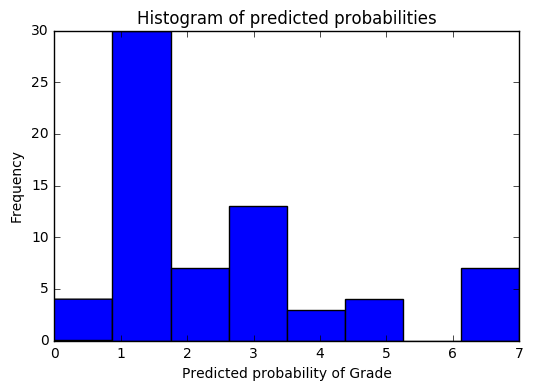

In [201]:
#Pengambaran histogram hasil prediksi data
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(predictions, bins=8)
plt.xlim(0, 7)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Grade')
plt.ylabel('Frequency')

In [197]:
# Prediksi dari 25 data awal
#  A- = 0, B+ = 2, B = 1, B- = 3, C+ = 5, C = 4, D = 6, E = 7
print('True:', tar_test.values[0:25])
print('Pred:', predictions[0:25])

True: [5 3 4 1 1 7 4 1 7 1 3 0 2 7 2 3 3 2 1 1 3 3 1 1 1]
Pred: [5 3 4 1 1 7 4 1 7 1 3 2 2 7 0 3 1 2 1 1 3 1 1 1 1]


In [198]:
#Confusion Matrix
from sklearn import metrics
print(metrics.accuracy_score(tar_test, predictions))

0.75


In [200]:
print(metrics.confusion_matrix(tar_test,predictions))

[[ 3  0  1  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0]
 [ 1  2  6  0  0  0  0  0]
 [ 0  6  0 10  0  0  0  0]
 [ 0  0  0  0  2  0  0  0]
 [ 0  1  0  2  0  2  0  0]
 [ 0  0  0  1  0  2  0  0]
 [ 0  0  0  0  1  0  0  7]]
